In [1]:
import sys
sys.path.append('.')
sys.path.append('..')
from SellkeSimulation.DynamicNetworks import dynamic_stochastic_block_model

In [2]:
sizes = [100, 100, 100]
probs = [[0.4, 0.001, 0.001],[0.001, 0.4, 0.001], [0.001, 0.001, 0.4]]
migration = [[0, 0.5, 0.5], [0.5, 0, 0.5], [0.5, 0.5, 0]]
exp_par = 10
time_until = 100

test_class = dynamic_stochastic_block_model(sizes, probs, migration, exp_par, time_until)
memberships = test_class.generate_migration_times(1)

In [3]:
test_class.G.nodes[1]

{'block': 0,
 'Membership Data': [(0, 0),
  (1, 8.66759426673266),
  (1, 29.18125949455482),
  (2, 38.20391681661623),
  (2, 52.6009655072976),
  (1, 56.25327921562907),
  (1, 76.88874126028387),
  (2, 79.43452085631364),
  (2, 102.80624161319389)],
 'Current Membership Index': 0,
 'Next Migration Time': 8.66759426673266}

In [4]:
test_class.get_node_migration_times(1)

[0,
 8.66759426673266,
 29.18125949455482,
 38.20391681661623,
 52.6009655072976,
 56.25327921562907,
 76.88874126028387,
 79.43452085631364,
 102.80624161319389]

In [5]:
test_class.get_node_memberships(1)

[0, 1, 1, 2, 2, 1, 1, 2, 2]

In [6]:
test_class.get_current_node_membership_index(1)

0

In [7]:
%%capture
test_class.get_next_migration_times()

In [8]:
test_class.get_node_current_block(1)

0

In [9]:
test_class.determine_nodes_to_migrate(0.1)

[110, 154, 215, 266]

In [10]:
nodes_to_migrate = test_class.determine_nodes_to_migrate(0.1)
test_class.get_node_next_migration_time(nodes_to_migrate[0])

0.07940694676610338

In [11]:
test_class.perform_migration_event(nodes_to_migrate[0])

In [12]:
test_class.get_node_next_migration_time(nodes_to_migrate[0])

0.9420079175582718

In [13]:
test_class.G.nodes[nodes_to_migrate[0]]

{'block': 2,
 'Membership Data': [(1, 0),
  (2, 0.07940694676610338),
  (0, 0.9420079175582718),
  (2, 26.215324587876456),
  (0, 30.543107728822022),
  (0, 34.31985623266328),
  (0, 48.29672811145498),
  (2, 51.087195484647204),
  (2, 54.876114918811794),
  (0, 56.238663204090265),
  (0, 57.18560924308551),
  (0, 58.043558518246954),
  (0, 59.19556133850533),
  (2, 66.0574539359446),
  (2, 74.90407590787531),
  (2, 98.31111639616648),
  (0, 139.85213033009597)],
 'Current Membership Index': 1,
 'Next Migration Time': 0.9420079175582718}

In [15]:
test_class.increment_network(1)
test_class.G

In [20]:
import networkx as nx
import matplotlib as m
import matplotlib.pyplot as mp

In [60]:
sizes = [10, 10, 10]
probs = [[0.9, 0.1, 0.1],[0.1, 0.9, 0.1], [0.1, 0.1, 0.9]]
migration = [[0, 0.5, 0.5], [0.5, 0, 0.5], [0.5, 0.5, 0]]
exp_par = 10
time_until = 100

test_class = dynamic_stochastic_block_model(sizes, probs, migration, exp_par, time_until)

def get_color_map():
    color_map = []
    for node in test_class.G.nodes:
        current_block = test_class.G.nodes[node]["block"]
        if current_block == 0:
            color_map.append('green')
        elif current_block == 1: color_map.append('blue')
        elif current_block == 2: color_map.append('yellow')
    return color_map

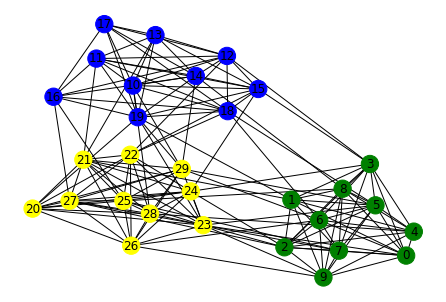

In [61]:
nx.draw(test_class.G, node_color = get_color_map(), with_labels = True)

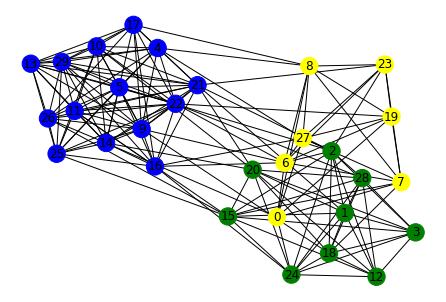

In [69]:
test_class.increment_network(1)
nx.draw(test_class.G, node_color = get_color_map(), with_labels = True)